**Data Cleaning and Preparation**

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris


df = pd.read_csv('/content/IRIS.csv')

print("Missing values before imputation:\n", df.isnull().sum())

imputer = SimpleImputer(strategy='mean')
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = imputer.fit_transform(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

print("\nMissing values after imputation:\n", df.isnull().sum())

scaler_minmax = MinMaxScaler()
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler_minmax.fit_transform(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

scaler_standard = StandardScaler()
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler_standard.fit_transform(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

z_scores = np.abs(stats.zscore(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]))
outliers = (z_scores > 3)

df_cleaned = df[~(outliers.any(axis=1))]

print("\nCleaned dataset:\n", df_cleaned)


Missing values before imputation:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Missing values after imputation:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Cleaned dataset:
      sepal_length  sepal_width  petal_length  petal_width  species
0       -0.900681     1.032057     -1.341272    -1.312977        0
1       -1.143017    -0.124958     -1.341272    -1.312977        0
2       -1.385353     0.337848     -1.398138    -1.312977        0
3       -1.506521     0.106445     -1.284407    -1.312977        0
4       -1.021849     1.263460     -1.341272    -1.312977        0
..            ...          ...           ...          ...      ...
145      1.038005    -0.124958      0.819624     1.447956        2
146      0.553333    -1.281972      0.705893     0.922064        2
147      0.795669    -0.124958      0.819624     1.053537        2
148      0.432165     0.800654     

**Clustering (k-means)**

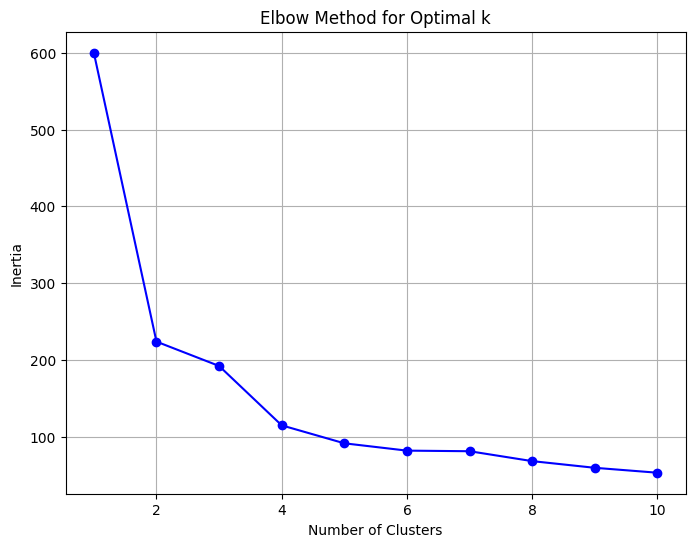

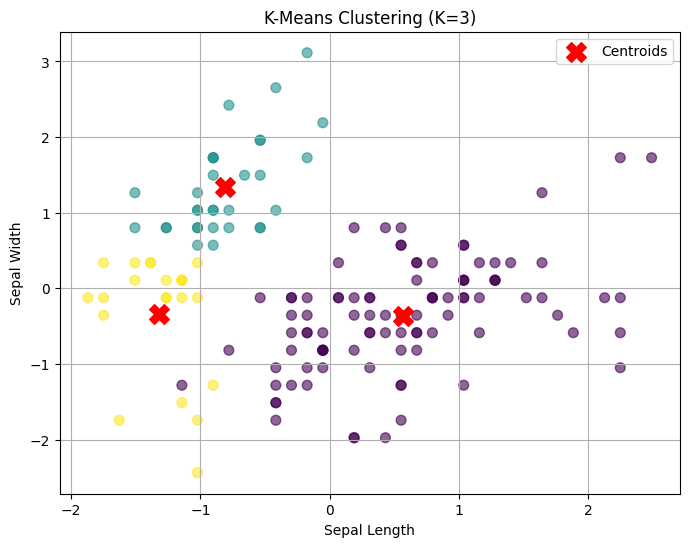

Silhouette Score: 0.4787
Inertia: 192.0372


In [8]:

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def plot_elbow_method(X):
    inertia_values = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia_values.append(kmeans.inertia_)

    plt.figure(figsize=(8,6))
    plt.plot(range(1, 11), inertia_values, marker='o', color='b')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

plot_elbow_method(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

def plot_clusters(X, kmeans, df):
    plt.figure(figsize=(8,6))
    plt.scatter(X['sepal_length'], X['sepal_width'], c=df['Cluster'], cmap='viridis', s=50, alpha=0.6)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title('K-Means Clustering (K=3)')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_clusters(X, kmeans, df)

sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {sil_score:.4f}")

inertia = kmeans.inertia_
print(f"Inertia: {inertia:.4f}")


**Fitting (Linear Regression)**

Training R-squared: 0.0094
Training MSE: 0.9787
Testing R-squared: -0.0210
Testing MSE: 1.0347


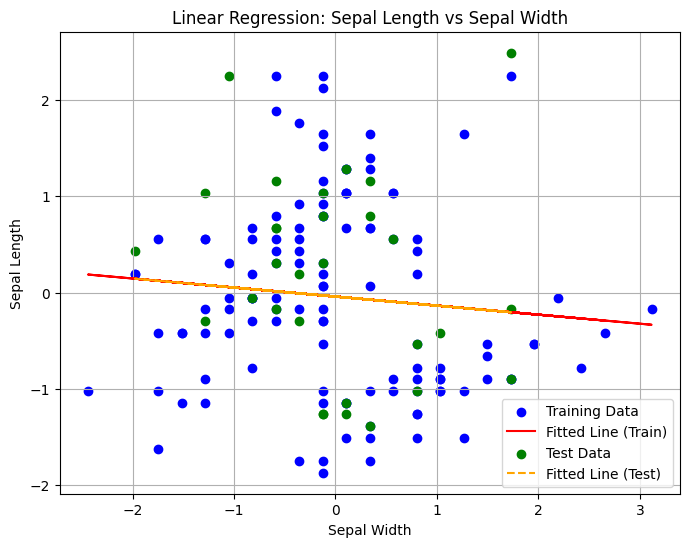

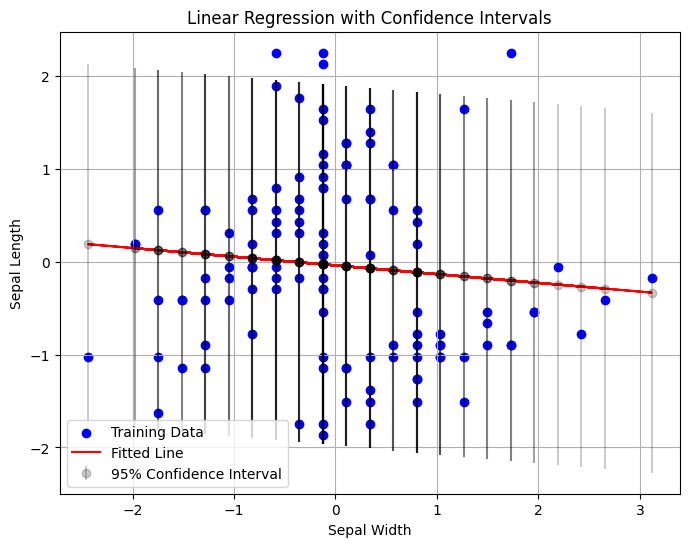

In [9]:

X = df[['sepal_width']]
y = df['sepal_length']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def fit_linear_regression(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    r2_train = r2_score(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f"Training R-squared: {r2_train:.4f}")
    print(f"Training MSE: {mse_train:.4f}")
    print(f"Testing R-squared: {r2_test:.4f}")
    print(f"Testing MSE: {mse_test:.4f}")

    plt.figure(figsize=(8, 6))

    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.plot(X_train, y_train_pred, color='red', label='Fitted Line (Train)')

    plt.scatter(X_test, y_test, color='green', label='Test Data')
    plt.plot(X_test, y_test_pred, color='orange', linestyle='--', label='Fitted Line (Test)')

    plt.title('Linear Regression: Sepal Length vs Sepal Width')
    plt.xlabel('Sepal Width')
    plt.ylabel('Sepal Length')
    plt.legend()
    plt.grid(True)
    plt.show()

    return model, r2_train, mse_train, r2_test, mse_test

model, r2_train, mse_train, r2_test, mse_test = fit_linear_regression(X_train, y_train, X_test, y_test)

def plot_with_confidence_intervals(X_train, y_train, model):
    X_train_array = X_train.to_numpy().flatten()
    y_pred = model.predict(X_train)
    residuals = y_train - y_pred

    std_err = np.std(residuals)

    ci = 1.96 * std_err

    plt.figure(figsize=(8, 6))
    plt.scatter(X_train_array, y_train, color='blue', label='Training Data')
    plt.plot(X_train_array, y_pred, color='red', label='Fitted Line')

    plt.errorbar(X_train_array, y_pred, yerr=ci, fmt='o', color='black', alpha=0.2, label='95% Confidence Interval')

    plt.title('Linear Regression with Confidence Intervals')
    plt.xlabel('Sepal Width')
    plt.ylabel('Sepal Length')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_with_confidence_intervals(X_train, y_train, model)


**Model Prediction**

Predicted Cluster Labels: [1 0]
Silhouette Score for Training Data: 0.5974744763869403
Linear Regression Model Evaluation:
R-squared: 0.5071428571428571
Mean Squared Error: 0.4665714285714286


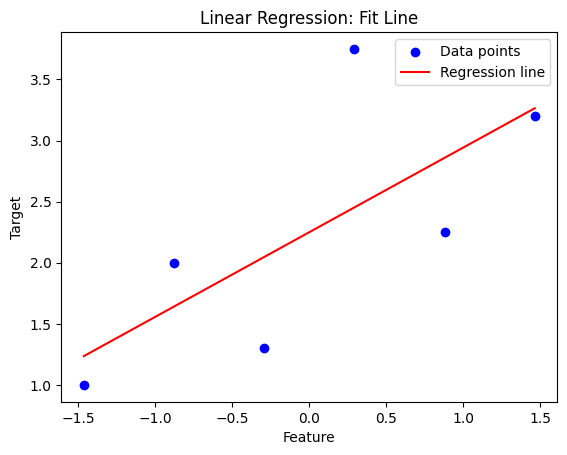

In [10]:

X = np.array([[5.1, 3.5, 1.4, 0.2],
              [4.9, 3.0, 1.4, 0.2],
              [6.2, 2.9, 4.3, 1.3],
              [5.7, 3.0, 4.2, 1.2],
              [6.5, 3.0, 5.5, 1.8],
              [5.3, 3.7, 1.5, 0.2]])

X_reg = np.array([[1], [2], [3], [4], [5], [6]])
y_reg = np.array([1, 2, 1.3, 3.75, 2.25, 3.2])

scaler_clustering = StandardScaler()
scaler_regression = StandardScaler()

X_scaled = scaler_clustering.fit_transform(X)
X_reg_scaled = scaler_regression.fit_transform(X_reg)

def clustering_prediction(X_train, X_new, model):
    if len(X_new.shape) == 1:
        X_new = X_new.reshape(1, -1)
    predicted_labels = model.predict(X_new)
    silhouette = silhouette_score(X_train, model.labels_)
    print("Predicted Cluster Labels:", predicted_labels)
    print("Silhouette Score for Training Data:", silhouette)
    return predicted_labels

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

X_new = np.array([[5.4, 3.2, 1.3, 0.4], [6.2, 3.4, 4.3, 1.3]])
if len(X_new.shape) == 1:
    X_new = X_new.reshape(-1, 4)
X_new_scaled = scaler_clustering.transform(X_new)
clustering_prediction(X_scaled, X_new_scaled, kmeans)

def linear_regression_prediction(X_train, y_train, X_new):
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_new)
    r2 = r2_score(y_train, model.predict(X_train))
    mse = mean_squared_error(y_train, model.predict(X_train))
    print("Linear Regression Model Evaluation:")
    print(f"R-squared: {r2}")
    print(f"Mean Squared Error: {mse}")
    return predictions, model

X_new_reg = np.array([[7], [8]])
if len(X_new_reg.shape) == 1:
    X_new_reg = X_new_reg.reshape(-1, 1)
X_new_reg_scaled = scaler_regression.transform(X_new_reg)
predictions, model = linear_regression_prediction(X_reg_scaled, y_reg, X_new_reg_scaled)

def plot_regression_line(X_train, y_train, model):
    plt.scatter(X_train, y_train, color='blue', label='Data points')
    plt.plot(X_train, model.predict(X_train), color='red', label='Regression line')
    plt.title('Linear Regression: Fit Line')
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.legend()
    plt.show()

plot_regression_line(X_reg_scaled, y_reg, model)


**Plotting and Visualization**

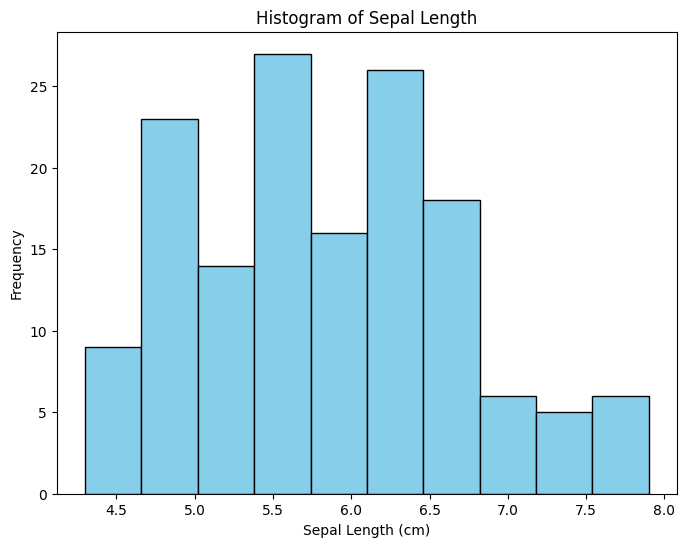

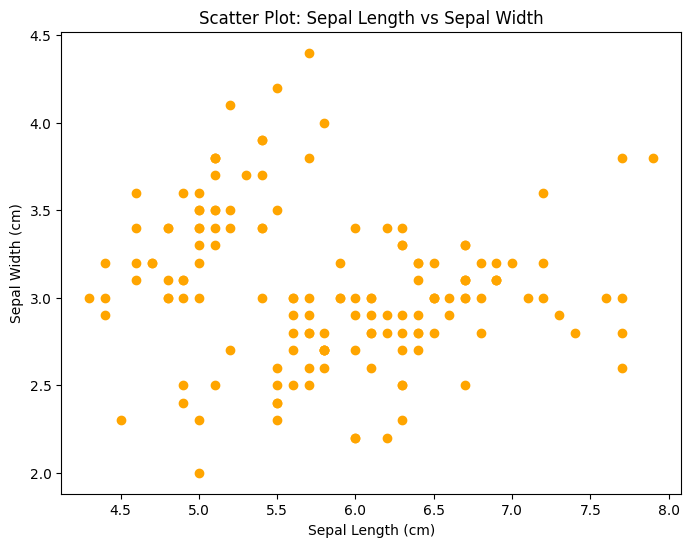

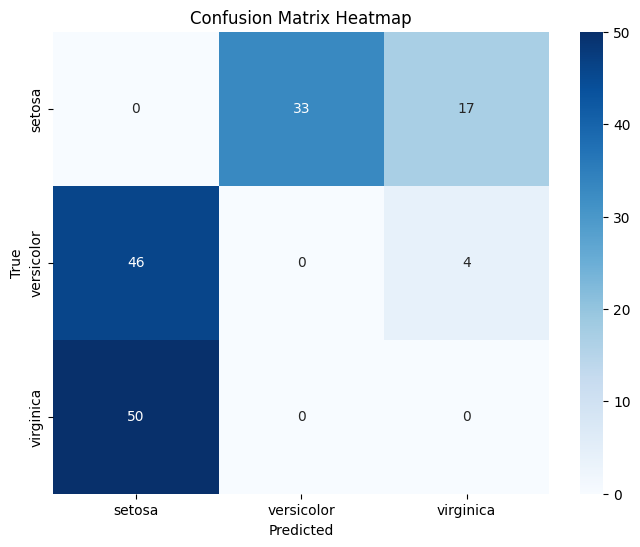

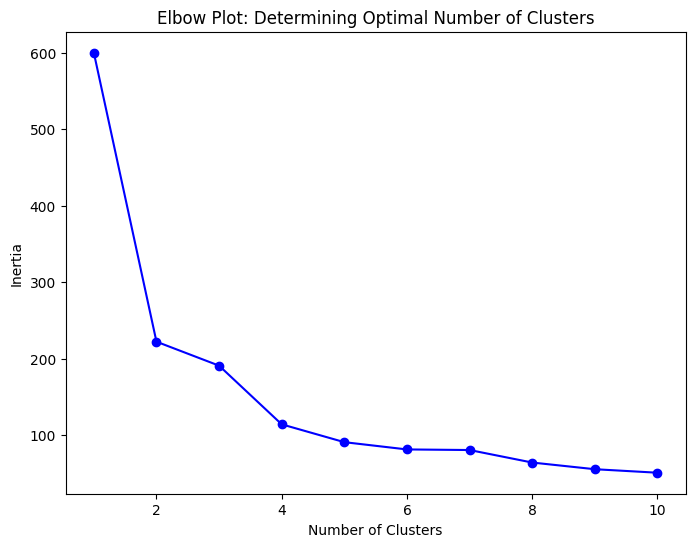

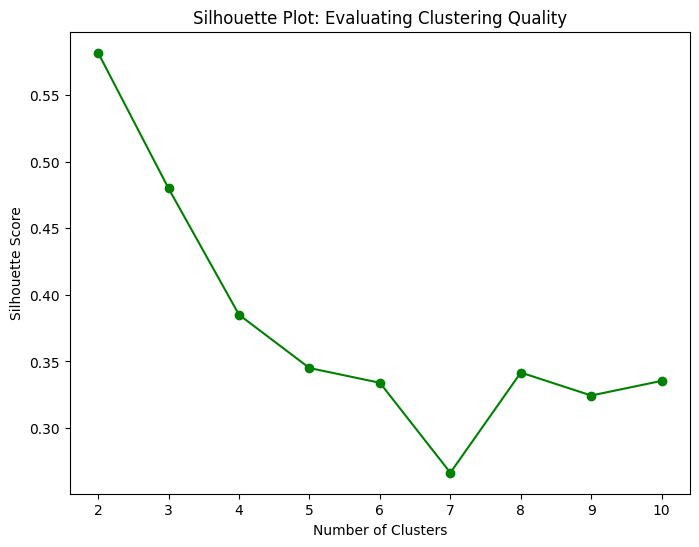

In [11]:

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X = df.drop(columns='target')
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

def plot_histogram():
    plt.figure(figsize=(8, 6))
    plt.hist(df['sepal length (cm)'], bins=10, color='skyblue', edgecolor='black')
    plt.title('Histogram of Sepal Length')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Frequency')
    plt.show()

def plot_scatter():
    plt.figure(figsize=(8, 6))
    plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], color='orange')
    plt.title('Scatter Plot: Sepal Length vs Sepal Width')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.show()

def plot_heatmap():
    y_true = y
    y_pred = kmeans.predict(X_scaled)
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
    plt.title('Confusion Matrix Heatmap')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_elbow():
    inertia = []
    k_range = range(1, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)
    plt.figure(figsize=(8, 6))
    plt.plot(k_range, inertia, marker='o', color='b')
    plt.title('Elbow Plot: Determining Optimal Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

def plot_silhouette():
    silhouette_vals = []
    k_range = range(2, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        silhouette_vals.append(silhouette_score(X_scaled, kmeans.labels_))
    plt.figure(figsize=(8, 6))
    plt.plot(k_range, silhouette_vals, marker='o', color='g')
    plt.title('Silhouette Plot: Evaluating Clustering Quality')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

plot_histogram()
plot_scatter()
plot_heatmap()
plot_elbow()
plot_silhouette()
